In [ ]:
import pandas as pd

In [ ]:
df = pd.read_excel('Chronic Kidney Disease Dataset.xls',sheet_name = 1)

In [ ]:
df.shape

(8819, 34)

In [ ]:
df.columns

Index(['ID', 'Age', 'Female', 'Racegrp', 'Educ', 'Unmarried', 'Income',
       'CareSource', 'Insured', 'Weight', 'Height', 'BMI', 'Obese', 'Waist',
       'SBP', 'DBP', 'HDL', 'LDL', 'Total Chol', 'Dyslipidemia', 'PVD',
       'Activity', 'PoorVision', 'Smoker', 'Hypertension', 'Fam Hypertension',
       'Diabetes', 'Fam Diabetes', 'Stroke', 'CVD', 'Fam CVD', 'CHF', 'Anemia',
       'CKD'],
      dtype='object')

In [ ]:
df.columns

Index(['ID', 'Age', 'Female', 'Racegrp', 'Educ', 'Unmarried', 'Income',
       'CareSource', 'Insured', 'Weight', 'Height', 'BMI', 'Obese', 'Waist',
       'SBP', 'DBP', 'HDL', 'LDL', 'Total Chol', 'Dyslipidemia', 'PVD',
       'Activity', 'PoorVision', 'Smoker', 'Hypertension', 'Fam Hypertension',
       'Diabetes', 'Fam Diabetes', 'Stroke', 'CVD', 'Fam CVD', 'CHF', 'Anemia',
       'CKD'],
      dtype='object')

In [ ]:
df.isna().sum()

ID                     0
Age                    0
Female                 0
Racegrp                0
Educ                  20
Unmarried            452
Income              1166
CareSource             0
Insured              113
Weight               194
Height               191
BMI                  290
Obese                290
Waist                314
SBP                  308
DBP                  380
HDL                   17
LDL                   18
Total Chol            16
Dyslipidemia           0
PVD                    0
Activity              10
PoorVision           567
Smoker                 0
Hypertension          80
Fam Hypertension       0
Diabetes               2
Fam Diabetes           0
Stroke                11
CVD                   23
Fam CVD              419
CHF                   36
Anemia                 6
CKD                 2819
dtype: int64

In [ ]:
df = df.dropna(subset=['CKD'])

I have did all the cleaning, Feature Engineering in Excel. 

**Reading the Final Data Set to do EDA and Build the model.**

In [2]:
df = pd.read_excel('Final Kindey.xlsx', sheet_name=0)

In [ ]:
df.shape #Shape

(5278, 23)

In [ ]:
df.columns #Columns 

Index(['Age', 'Gender', 'Racegrp', 'White', 'Black', 'Hispa', 'Other',
       'Under Weight Flag', 'BMI', 'Total Chol', 'PVD', 'Activity',
       'PoorVision', 'Smoker', 'Hypertension', 'Fam Hypertension', 'Diabetes',
       'Fam Diabetes', 'Stroke', 'CVD', 'Fam CVD', 'CHF', 'CKD'],
      dtype='object')

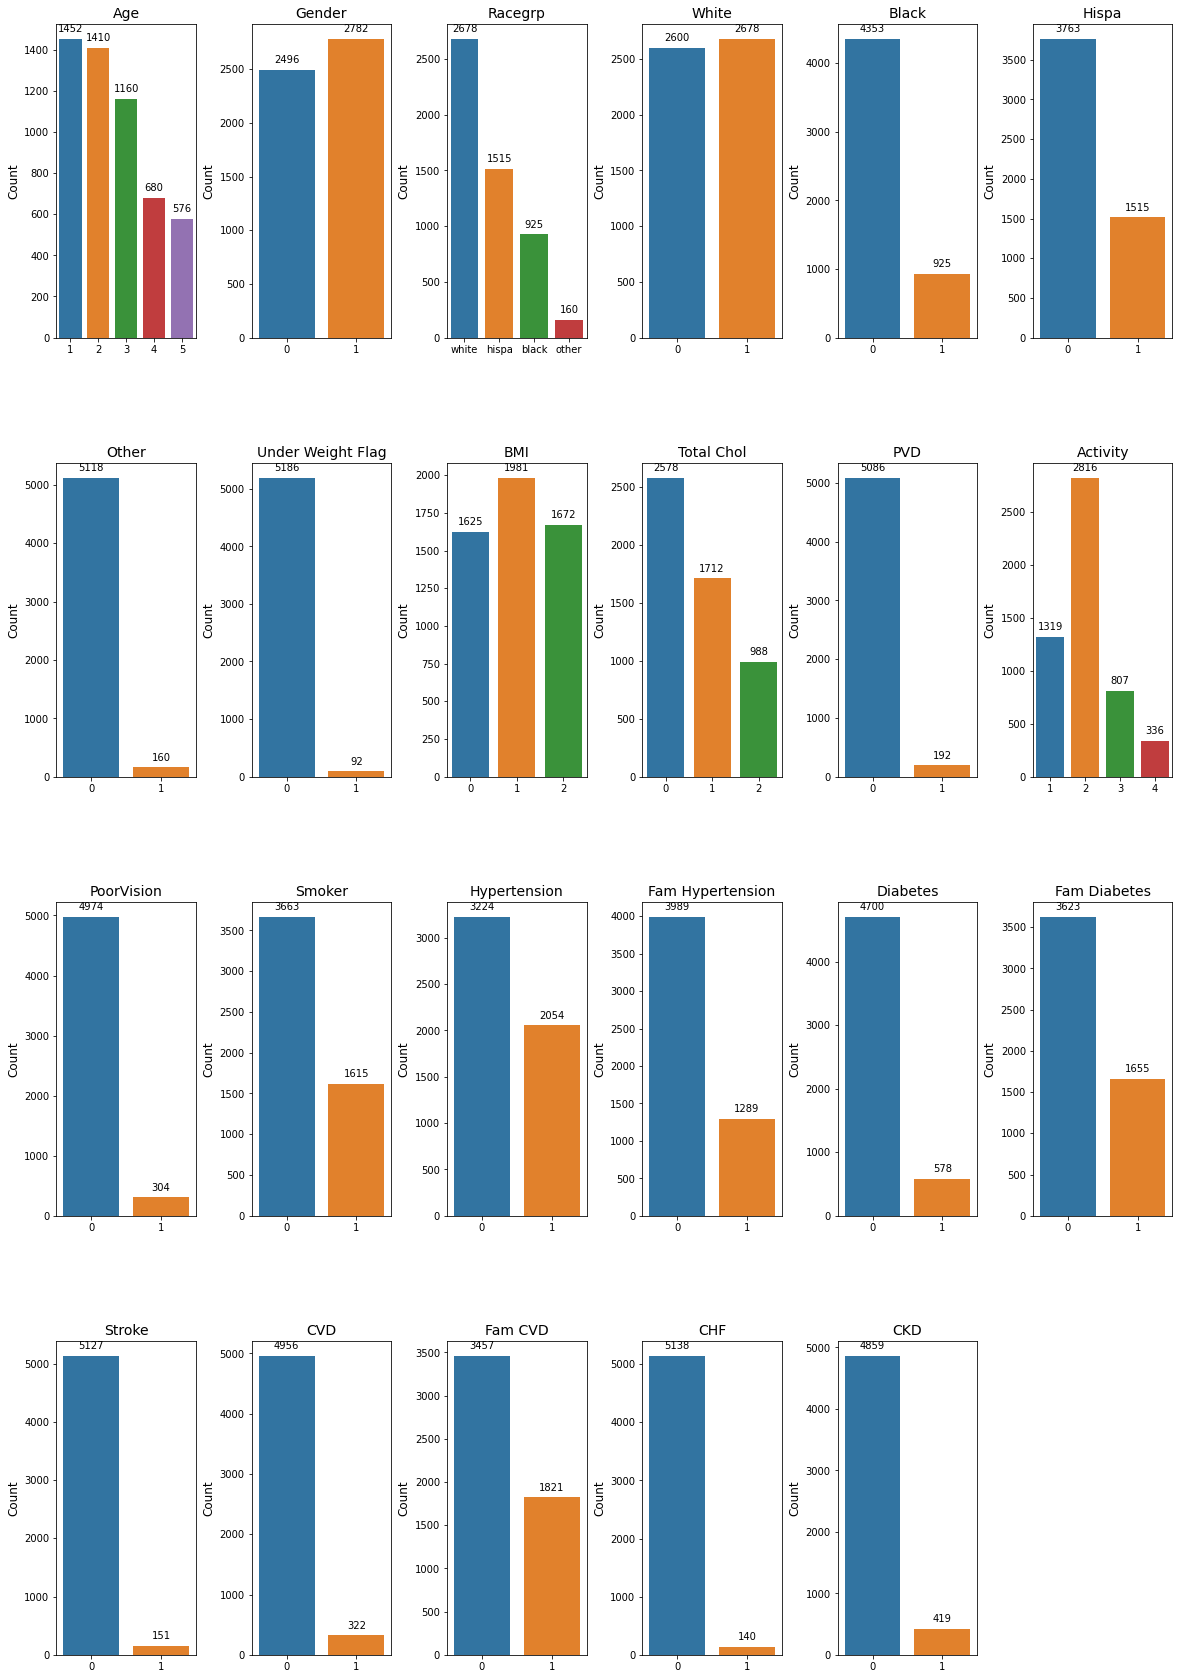

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

vars_list = ['Age', 'Gender', 'Racegrp', 'White', 'Black', 'Hispa', 'Other',
       'Under Weight Flag', 'BMI', 'Total Chol', 'PVD', 'Activity',
       'PoorVision', 'Smoker', 'Hypertension', 'Fam Hypertension', 'Diabetes',
       'Fam Diabetes', 'Stroke', 'CVD', 'Fam CVD', 'CHF', 'CKD']


# Set the figure size and layout
plt.figure(figsize=(20, 30))
plt.subplots_adjust(hspace=0.4, wspace=0.4)

# Loop through the variables and create countplots
for i, var in enumerate(vars_list):
    ax = plt.subplot(4,6, i+1) # Set the subplot position
    sns.countplot(x=var, data=df, ax=ax) # Create the countplot
    plt.title(var, fontsize=14) # Set the title font size
    plt.xlabel("") # Remove the x-axis label
    plt.ylabel("Count", fontsize=12) # Set the y-axis label font size
    # Add count values to each bar
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
            ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points', fontsize=10)

plt.show() # Show the plots


In [3]:
import pandas as pd
from scipy.stats import chi2_contingency

# read in your dataset as a Pandas DataFrame


# set the name of your target variable
target_var = 'CKD'

# create a list of your independent categorical variables
cat_vars = ['Age', 'Gender', 'Racegrp', 'White', 'Black', 'Hispa', 'Other',
       'Under Weight Flag', 'BMI', 'Total Chol', 'PVD', 'Activity',
       'PoorVision', 'Smoker', 'Hypertension', 'Fam Hypertension', 'Diabetes',
       'Fam Diabetes', 'Stroke', 'CVD', 'Fam CVD', 'CHF']


# loop through each independent variable and perform chi-square test
for var in cat_vars:
    # create a cross-tabulation table between the independent variable and the target variable
    cross_tab = pd.crosstab(index=df[target_var], columns=df[var])

    # perform chi-square test and print the results
    chi2, p_val, dof, expected = chi2_contingency(cross_tab)
    print(f'Chi-square test for {var} vs {target_var}:')
    print('Chi-square statistic: ', chi2)
    print('p-value: ', p_val)
    print('Degrees of freedom: ', dof)
    print('Expected frequencies: \n', expected)
    print('\n')

    # determine the significance of the relationship
    if p_val < 0.05:
        print('There is a significant relationship between the variables.')
    else:
        print('There is no significant relationship between the variables.')
    print('\n')

    # print the cross-tabulation table
    print('Cross-tabulation table:')
    print(cross_tab)
    print('\n\n\n\n')


Chi-square test for Age vs CKD:
Chi-square statistic:  1011.3330061007865
p-value:  1.2489649041133014e-217
Degrees of freedom:  4
Expected frequencies: 
 [[1336.73133763 1298.06555513 1067.91208791  626.01743085  530.27358848]
 [ 115.26866237  111.93444487   92.08791209   53.98256915   45.72641152]]


There is a significant relationship between the variables.


Cross-tabulation table:
Age     1     2     3    4    5
CKD                            
0    1449  1390  1098  567  355
1       3    20    62  113  221





Chi-square test for Gender vs CKD:
Chi-square statistic:  0.33174284992610414
p-value:  0.5646346326089632
Degrees of freedom:  1
Expected frequencies: 
 [[2297.85221675 2561.14778325]
 [ 198.14778325  220.85221675]]


There is no significant relationship between the variables.


Cross-tabulation table:
Gender     0     1
CKD               
0       2304  2555
1        192   227





Chi-square test for Racegrp vs CKD:
Chi-square statistic:  52.068875977857964
p-value:  2.89

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr



variables = ['BMI Interaction','Family History Score', 'CKD']


selected_data = df[variables]


corr_matrix = selected_data.corr()


p_values = np.zeros_like(corr_matrix)
for i in range(len(variables)):
    for j in range(i+1, len(variables)):
        corr, p_val = pearsonr(selected_data[variables[i]], selected_data[variables[j]])
        p_values[i, j] = p_val

p_values[p_values == 0] = np.nan


In [ ]:
df.columns

Index(['Age', 'Gender', 'Racegrp', 'White', 'Black', 'Hispa', 'Other',
       'Under Weight Flag', 'BMI', 'Total Chol', 'PVD', 'Activity',
       'PoorVision', 'Smoker', 'Hypertension', 'Fam Hypertension', 'Diabetes',
       'Fam Diabetes', 'Stroke', 'CVD', 'Fam CVD', 'CHF', 'CKD'],
      dtype='object')

In [7]:
# Confusion Matrix Plotting Function -- feel free to save and use later
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics #auc, roc, and other scores
from sklearn.metrics import confusion_matrix

def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='magma',     # cmaps = magma, copper, mako, nipy_spectral
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    ---------
    cf:            confusion matrix to be passed in
    group_names:   List of strings that represent the labels row by row to be shown in each square.
    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'
    count:         If True, show the raw number in the confusion matrix. Default is True.
    percent:     If True, show the proportions for each category. Default is True.
    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.
    xyticks:       If True, show x and y ticks. Default is True.
    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.
    sum_stats:     If True, display summary statistics below the figure. Default is True.
    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.
    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
                   
    title:         Title for the heatmap. Default is None.
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('Actual')
        plt.xlabel('Predicted' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report


X = df[['Age','White', 'Black', 'Hispa', 'Other','BMI','PVD', 'Activity',
       'PoorVision', 'Smoker', 'Hypertension', 'Fam Hypertension', 'Diabetes', 'Stroke', 'CVD', 'Fam CVD', 'CHF']]

y = df['CKD']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Instantiate the logistic regression model
logreg = LogisticRegression()

# Fit the model to the training data
logreg.fit(X_train, y_train)

# Predict the target variable for the testing set
y_pred = logreg.predict(X_test)

# Calculate the model metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

# Output the model metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)
print("Confusion Matrix:\n", confusion)
print('Classification report:\n', classification_report(y_test, y_pred))



odds_ratios = np.exp(logreg.coef_[0])

# Create a dataframe to store the results
results_df = pd.DataFrame({'Odds Ratio': odds_ratios}, index=X.columns)

# Sort the dataframe by descending order of odds ratio
results_df = results_df.sort_values(by='Odds Ratio', ascending=False)

# Print the sorted dataframe
print(results_df)



Accuracy: 0.9286616161616161
Precision: 0.4722222222222222
Recall: 0.15315315315315314
F1 Score: 0.2312925170068027
ROC AUC Score: 0.5701271536302086
Confusion Matrix:
 [[1454   19]
 [  94   17]]
Classification report:
               precision    recall  f1-score   support

           0       0.94      0.99      0.96      1473
           1       0.47      0.15      0.23       111

    accuracy                           0.93      1584
   macro avg       0.71      0.57      0.60      1584
weighted avg       0.91      0.93      0.91      1584

                  Odds Ratio
Age                 2.856931
Hypertension        1.961171
Diabetes            1.908407
PVD                 1.894247
Fam CVD             1.880505
CHF                 1.766218
CVD                 1.760773
White               1.393991
BMI                 1.162738
Black               1.158375
Stroke              0.995429
Smoker              0.945977
Other               0.901923
PoorVision          0.900868
Activity          

AUC- 57.01


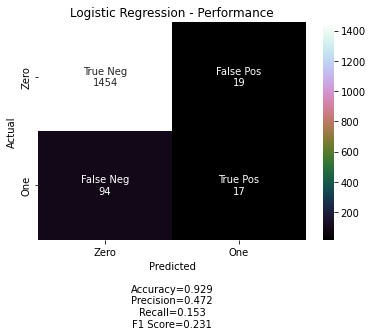

In [17]:
# Plot Confusion Matrix
model_name = 'Logistic Regression'
cm = confusion_matrix(y_test, y_pred)
labels = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
categories = ['Zero', 'One']
make_confusion_matrix(cm, group_names=labels, categories=categories, percent=False, cmap='cubehelix')
plt.title(f'{model_name} - Performance')
print(f"AUC- {metrics.roc_auc_score(y_test, y_pred) *100:.2f}")

In [18]:
# Load the new dataset (assuming it has the same column names as the original dataset)
new_data = pd.read_excel('Final Kindey.xlsx', sheet_name= 1)

# Extract the features from the new dataset
X_new = new_data[['Age','White', 'Black', 'Hispa', 'Other','BMI','PVD', 'Activity',
       'PoorVision', 'Smoker', 'Hypertension', 'Fam Hypertension', 'Diabetes', 'Stroke', 'CVD', 'Fam CVD', 'CHF']]

# Predict the target variable for the new dataset
y_new = logreg.predict(X_new)

# Print the predicted target variable for the new dataset
print(y_new)


[0 0 0 ... 0 0 0]


In [19]:
new_data['CKD_Predicted'] = y_new

# Save the new dataset with the predicted values
new_data.to_csv('new_data_with_predictions.csv', index=False)

AUC- 55.62
                  Odds Ratio
Age                 2.701082
Hypertension        1.665152
Diabetes            1.563611
CVD                 1.483390
PVD                 1.437569
CHF                 1.348542
Fam CVD             1.286800
White               1.251255
BMI                 1.151288
Stroke              1.116091
Black               1.094259
Smoker              0.990621
PoorVision          0.974883
Other               0.966741
Fam Hypertension    0.883068
Hispa               0.755272
Activity            0.746370


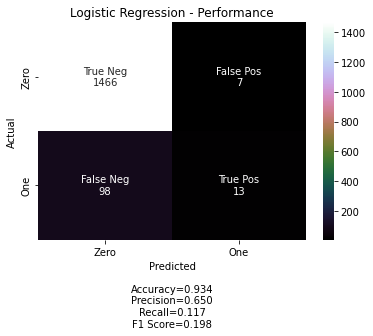

In [15]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.datasets import make_classification


# Define the logistic regression model with cross-validation
logreg_cv = LogisticRegressionCV(cv=10, max_iter=10000, random_state=42)

# Fit the model to the data
logreg_cv.fit(X_train, y_train)

lr_pred = logreg_cv.predict(X_test)

# Plot Confusion Matrix
model_name = 'Logistic Regression'
cm = confusion_matrix(y_test, lr_pred)
labels = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
categories = ['Zero', 'One']
make_confusion_matrix(cm, group_names=labels, categories=categories, percent=False, cmap='cubehelix')
plt.title(f'{model_name} - Performance')
print(f"AUC- {metrics.roc_auc_score(y_test, lr_pred) *100:.2f}")




# Create a dataframe to store the results
results_df = pd.DataFrame({'Odds Ratio': odds_ratios}, index=X.columns)

odds_ratios = np.exp(logreg_cv.coef_[0])



# Sort the dataframe by descending order of odds ratio
results_df = results_df.sort_values(by='Odds Ratio', ascending=False)

# Print the sorted dataframe
print(results_df)




In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

# Load the dataset into a pandas DataFrame called 'df'
# ...

# Define the predictor variables and the target variable
X = df[['Age','White', 'Black', 'Hispa', 'Other','BMI', 'Total Chol','PVD', 'Activity',
       'PoorVision', 'Smoker', 'Hypertension', 'Fam Hypertension', 'Diabetes',
       'Fam Diabetes', 'Stroke', 'CVD', 'Fam CVD', 'CHF']]
y = df['CKD']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit the logistic regression model using statsmodels
X_train = sm.add_constant(X_train)  # add a constant term for the intercept
logit_model = sm.Logit(y_train, X_train)
logit_results = logit_model.fit()

# Extract the odds ratios and p-values from the model results
odds_ratios = np.exp(logit_results.params[1:])
p_values = logit_results.pvalues[1:]

# Combine the odds ratios and p-values into a DataFrame
results_df = pd.DataFrame({'Odds Ratio': odds_ratios, 'p-value': p_values}, index=X.columns)
print(results_df)


Optimization terminated successfully.
         Current function value: 0.192230
         Iterations 8
                  Odds Ratio       p-value
Age                 2.864559  1.101367e-42
White               0.375773           NaN
Black               0.316693           NaN
Hispa               0.184393           NaN
Other               0.242858           NaN
BMI                 1.159682  1.259914e-01
Total Chol          1.110002  2.502925e-01
PVD                 1.941246  2.638529e-03
Activity            0.742092  6.122955e-03
PoorVision          0.905644  6.585655e-01
Smoker              0.953451  7.401110e-01
Hypertension        1.977715  7.494688e-05
Fam Hypertension    0.556952  2.737789e-02
Diabetes            2.064813  3.189021e-05
Fam Diabetes        0.846873  2.793892e-01
Stroke              0.938432  8.479421e-01
CVD                 1.858638  1.171319e-02
Fam CVD             2.037431  2.283329e-03
CHF                 1.831963  2.087913e-02
